In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [201]:
from astropy.io import fits
from astropy.table import Table

In [129]:
import pymangle

In [130]:
def write_header(hdu, filename):
    hdu.name = 'CATALOG'
    hdu.header["EXTNAME"] = 'CATALOG '
    hdu.header["FILENAME"] = filename
    hdu.header["TELESCOP"] = 'BOSS '
    hdu.header["INSTRUME"] = "BOSS DR12"
    hdu.header["CAT_TYPE"] = 'NOT_PROXY'
    hdu.header["CAT_NAME"] = ""
    hdu.header["COORD"] = "EQUATORIAL"
    hdu.header["ANGLE"] = "DEG"
    hdu.header["SELECT"] = "EUCLIDLIKE"

North data

In [131]:
hdulN = fits.open('../myfarm-disk/BossAnalysis/BOSS_DR12_v5_catalogues/data/galaxy_DR12v5_CMASSLOWZTOT_North.fits')
hdrN = hdulN[1].header
dataN = hdulN[1].data

In [132]:
dataN.columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'RUN'; format = 'J'
    name = 'RERUN'; format = '12A'
    name = 'CAMCOL'; format = 'J'
    name = 'FIELD'; format = 'J'
    name = 'ID'; format = 'J'
    name = 'ICHUNK'; format = 'J'
    name = 'IPOLY'; format = 'J'
    name = 'ISECT'; format = 'J'
    name = 'FRACPSF'; format = '5E'
    name = 'EXPFLUX'; format = '5E'
    name = 'DEVFLUX'; format = '5E'
    name = 'PSFFLUX'; format = '5E'
    name = 'MODELFLUX'; format = '5E'
    name = 'FIBER2FLUX'; format = '5E'
    name = 'R_DEV'; format = '5E'
    name = 'EXTINCTION'; format = '5E'
    name = 'PSF_FWHM'; format = '5E'
    name = 'AIRMASS'; format = 'E'
    name = 'SKYFLUX'; format = '5E'
    name = 'EB_MINUS_V'; format = 'E'
    name = 'IMAGE_DEPTH'; format = '5E'
    name = 'IMATCH'; format = 'J'
    name = 'Z'; format = 'E'
    name = 'WEIGHT_FKP'; format = 'E'
    name = 'WEIGHT_CP'; format = 'E'
    name = 'WEIGHT_NOZ'; format = 'E'
    name = 

In [133]:
np.where(dataN['Z'] < 0.0)

(array([ 18466,  30054,  30578,  30890,  31751,  51641,  60750,  64156,
         83390,  83508,  91194, 120460, 127272, 147073, 147352, 151890,
        155912, 156302, 156349, 156415, 157605, 166408, 169660, 170110,
        172247, 181403, 191423, 192841, 196396, 197642, 219401, 247762,
        254154, 289318, 365117, 367314, 373245, 375526, 378291, 378304,
        378711, 382173, 411728, 438476, 440202, 447369, 451571, 452332,
        480385, 489730, 523609, 525687, 535770, 539275, 797484, 858051,
        861219, 875705, 876150, 888093, 900523, 932059]),)

South data

In [134]:
hdulS = fits.open('../myfarm-disk/BossAnalysis/BOSS_DR12_v5_catalogues/data/galaxy_DR12v5_CMASSLOWZTOT_South.fits')
hdrS = hdulS[1].header
dataS = hdulS[1].data

North random

In [135]:
hdulN_R = fits.open('../myfarm-disk/BossAnalysis/BOSS_DR12_v5_catalogues/random/random0_DR12v5_CMASSLOWZTOT_North.fits')
hdrN_R= hdulN_R[1].header
dataN_R = hdulN_R[1].data

In [136]:
dataN_R.columns

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z'; format = 'D'
    name = 'WEIGHT_FKP'; format = 'D'
    name = 'NZ'; format = 'D'
    name = 'IPOLY'; format = 'I'
    name = 'ISECT'; format = 'I'
    name = 'ZINDX'; format = 'J'
    name = 'SKYFLUX'; format = '5E'
    name = 'IMAGE_DEPTH'; format = '5E'
    name = 'AIRMASS'; format = 'E'
    name = 'EB_MINUS_V'; format = 'E'
    name = 'PSF_FWHM'; format = '5E'
)

South random

In [137]:
hdulS_R = fits.open('../myfarm-disk/BossAnalysis/BOSS_DR12_v5_catalogues/random/random0_DR12v5_CMASSLOWZTOT_South.fits')
hdrS_R = hdulS_R[1].header
dataS_R = hdulS_R[1].data

# redshfit distribution

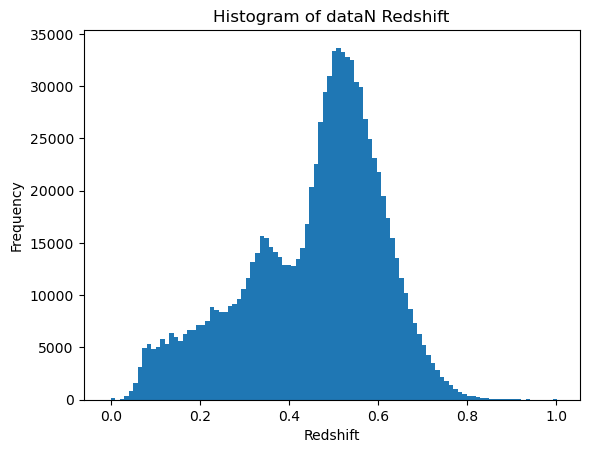

In [138]:
plt.hist(dataN['Z'], bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataN Redshift')
plt.show()


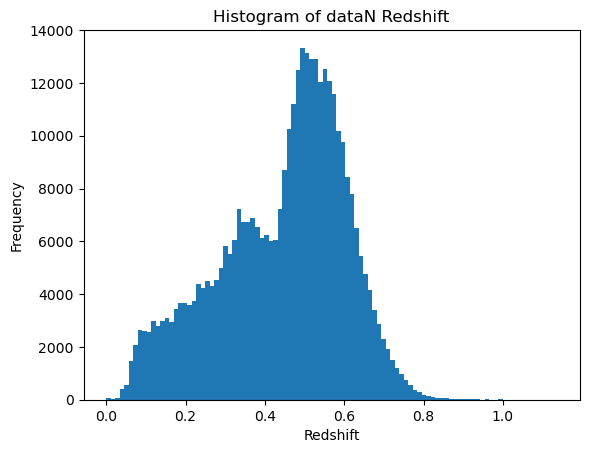

In [139]:
plt.hist(dataS['Z'], bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataN Redshift')
plt.show()

## PyMangle mask

In [140]:
maskpath_south = '/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_catalogues/masks/mask_DR12v5_CMASSLOWZTOT_South.ply'

In [141]:
# read a mangle polygon file
m = pymangle.Mangle(maskpath_south)

# test ra,dec point against the mask
good = m.contains(np.random.uniform(0,180, 21653140), np.random.uniform(0,180, 21653140))

In [142]:
len(good)

21653140

# footprint

In [143]:
z0_N=np.where(dataN['Z'] < 0.0)
z0_S=np.where(dataS['Z'] < 0.0)

z0_NR=np.where(dataN_R['Z'] < 0.0)
z0_SR=np.where(dataS_R['Z'] < 0.0)

In [144]:
len(z0_N[0]), len(z0_S[0]), len(z0_NR[0]), len(z0_SR[0])

(62, 59, 3231, 2477)

There are some galaxies with negative z. I'll remove them, because the reconstruction code converts all coordinates regardless of their weights, and raises and error when z<0

In [145]:
np.min(dataN['RA']), np.max(dataN['RA']), np.min(dataN['DEC']), np.max(dataN['DEC'])

(108.93713069095938,
 263.90750667151144,
 -3.6281203026551636,
 68.73769854149388)

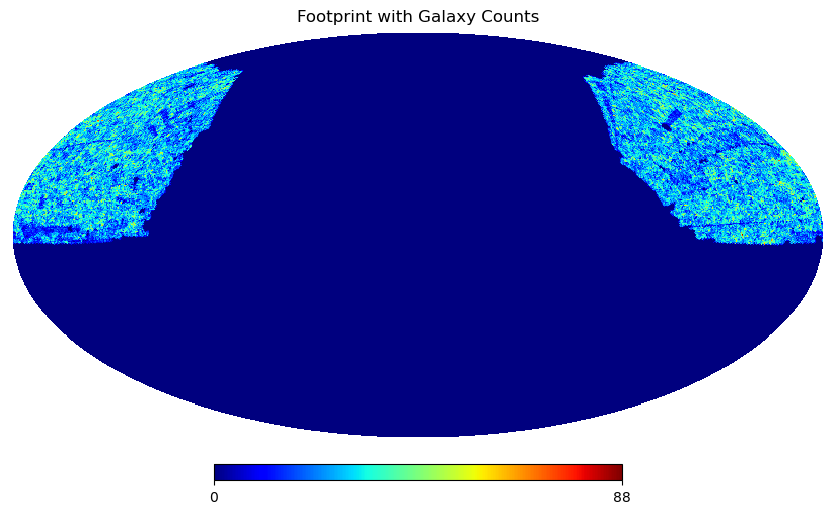

In [146]:
import healpy as hp

# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside, dataN['RA'], dataN['DEC'], lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint with Galaxy Counts', cmap='jet')


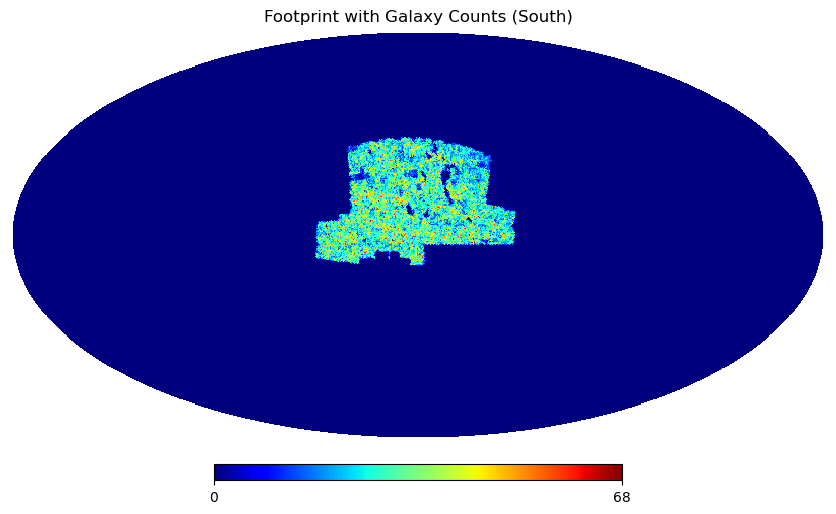

In [147]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside, dataS['RA'], dataS['DEC'], lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint with Galaxy Counts (South)', cmap='jet')


# Weights

Compute FKP via the definition

In [148]:
P0 = 10000

In [149]:
fkpN = 1./(1+dataN['NZ']*P0)
fkpS = 1./(1+dataS['NZ']*P0)

test that the fkp weights agree with their definition

In [150]:
fkpS == dataS['WEIGHT_FKP']

array([ True,  True,  True, ...,  True,  True,  True])

In [151]:
fkpN == dataN['WEIGHT_FKP']

array([ True,  True,  True, ...,  True,  True,  True])

In [152]:
fkpS = dataS['WEIGHT_FKP']
fkpN = dataN['WEIGHT_FKP']

### export in a format compatible with euclid 2pcf code and with the reconstraction code

### boss north

In [153]:
# total weight including fkp
wtotN_fkp = fkpN * dataN['WEIGHT_SYSTOT']*(dataN['WEIGHT_CP'] + dataN['WEIGHT_NOZ'] - 1)

remove galaxies with negative redshift

In [154]:
zpositiveN = np.where(dataN['Z'] > 0.0)
raN = np.array(dataN['RA'])[zpositiveN]
decN = np.array(dataN['DEC'])[zpositiveN]
zN = np.array(dataN['Z'])[zpositiveN]
wtotN_fkp = np.array(wtotN_fkp)[zpositiveN]

In [155]:
np.where(zN < 0.0)

(array([], dtype=int64),)

create the HDU for the north galaxy catalogue

In [156]:
north = fits.BinTableHDU(Table([raN, decN, zN, wtotN_fkp], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT')))

shuffle the random, remove galaxies with z<0

In [157]:
zpositiveN_R = np.where(dataN_R['Z'] > 0.0)
raN_R = np.array(dataN_R['RA'])[zpositiveN_R]
decN_R = np.array(dataN_R['DEC'])[zpositiveN_R]
zN_R = np.array(dataN_R['Z'])[zpositiveN_R]
wtotN_fkp_R = np.array(dataN_R['WEIGHT_FKP'])[zpositiveN_R]

In [158]:
np.where(zN_R < 0.0)

(array([], dtype=int64),)

In [159]:
mask_north = np.random.permutation(len(raN_R))

raN_R = np.array(raN_R)[mask_north]
decN_R = np.array(decN_R)[mask_north]
zN_R = np.array(zN_R)[mask_north]
weightN_R = np.array(wtotN_fkp_R)[mask_north]

create the HDU for the north random catalogue

In [160]:
northR = fits.BinTableHDU(Table([raN_R, decN_R, zN_R, weightN_R], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT')))

write the headers

In [161]:
write_header(north, 'BOSS_DR12_CMASSLOWZTOT_North_z1+z2.fits')
write_header(northR, 'BOSS_DR12_CMASSLOWZTOT_North_Randoms_z1+z2.fits')

In [162]:
north.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   24 / length of dimension 1                          
NAXIS2  =               953193 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'RA      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'DEC     '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'REDSHIFT'        

In [163]:
import os

In [164]:
outdir = '../myfarm-disk/BossAnalysis/myBOSS_catalogues/'

if not os.path.exists(outdir):
    os.makedirs(outdir)

In [165]:
north.writeto(os.path.join(outdir,'data/myBOSS_DR12_CMASSLOWZTOT_North_z1+z2.fits'), overwrite=True)
northR.writeto(os.path.join(outdir,'random/myBOSS_DR12_CMASSLOWZTOT_North_Randoms_z1+z2.fits'), overwrite=True)

### boss south

In [166]:
wtotS_fkp = fkpS * dataS['WEIGHT_SYSTOT']*(dataS['WEIGHT_CP'] + dataS['WEIGHT_NOZ'] - 1)

remove galaxies with negative redshift

In [167]:
zpositiveS = np.where(dataS['Z'] > 0.0)
raS = np.array(dataS['RA'])[zpositiveS]
decS = np.array(dataS['DEC'])[zpositiveS]
zS = np.array(dataS['Z'])[zpositiveS]
wtotS_fkp = np.array(wtotS_fkp)[zpositiveS]

create the HDU for the south galaxy catalogue

In [168]:
south = fits.BinTableHDU(Table([raS, decS, zS, wtotS_fkp], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT' )))

shuffle the random for the south, remove galaxies with negative redshift

In [169]:
zpositiveS_R = np.where(dataS_R['Z'] > 0.0)
raS_R = np.array(dataS_R['RA'])[zpositiveS_R]
decS_R = np.array(dataS_R['DEC'])[zpositiveS_R]
zS_R = np.array(dataS_R['Z'])[zpositiveS_R]
weightS_R = np.array(dataS_R['WEIGHT_FKP'])[zpositiveS_R]

In [170]:
mask_south = np.random.permutation(len(raS_R))
raS_R = np.array(raS_R)[mask_south]
decS_R = np.array(decS_R)[mask_south]
zS_R = np.array(zS_R)[mask_south]
weightS_R = np.array(weightS_R)[mask_south]

create the HDU for the south random 

In [171]:
southR = fits.BinTableHDU(Table([raS_R, decS_R, zS_R, weightS_R], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT' )))

write the headers

In [172]:
write_header(south, 'BOSS_DR12_CMASSLOWZTOT_South_z1+z2.fits')
write_header(southR, 'BOSS_DR12_CMASSLOWZTOT_South_Randoms_z1+z2.fits')

In [173]:
south.writeto(os.path.join(outdir,'data/myBOSS_DR12_CMASSLOWZTOT_South_z1+z2.fits'), overwrite=True)
southR.writeto(os.path.join(outdir,'random/myBOSS_DR12_CMASSLOWZTOT_South_Randoms_z1+z2.fits'), overwrite=True)

### check everything is ok after reshuffling

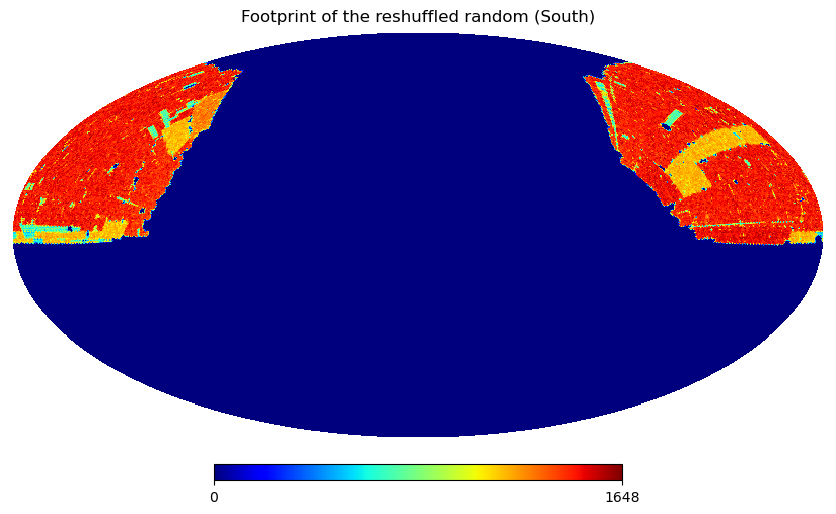

In [174]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside, raN_R, decN_R, lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint of the reshuffled random (South)', cmap='jet')

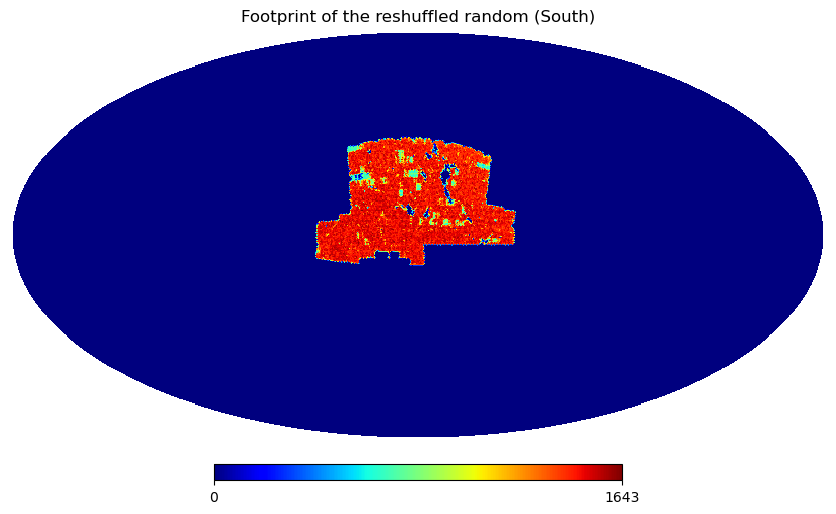

In [175]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside, raS_R, decS_R, lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint of the reshuffled random (South)', cmap='jet')

Text(0.5, 1.0, 'Histogram of dataN Redshift')

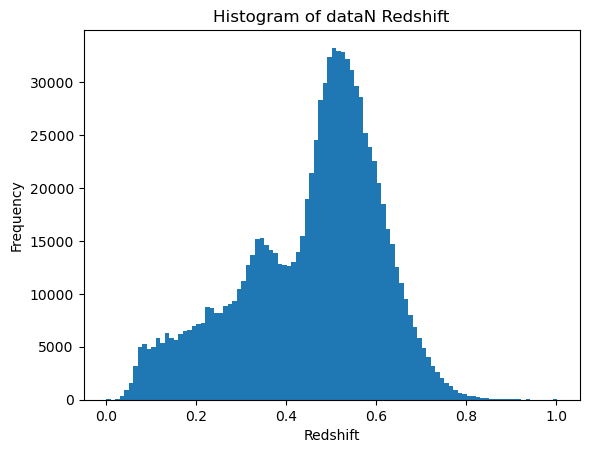

In [176]:
plt.hist(zN, bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataN Redshift')

Text(0.5, 1.0, 'Histogram of dataS Redshift')

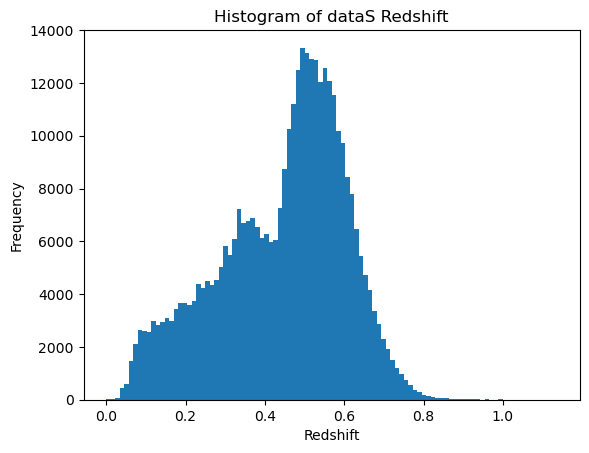

In [177]:
plt.hist(zS, bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataS Redshift')

Text(0.5, 1.0, 'Histogram of dataN_R Redshift')

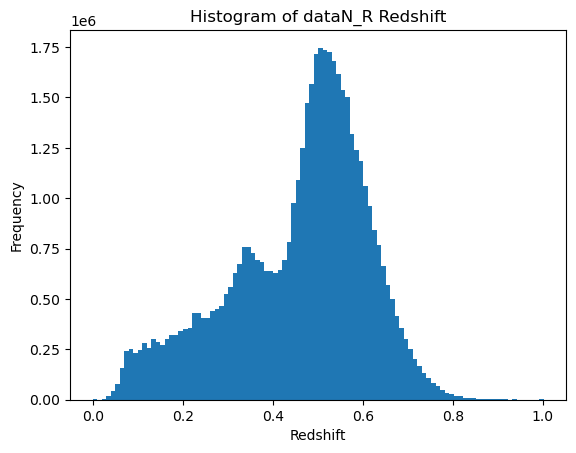

In [178]:
plt.hist(zN_R, bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataN_R Redshift')

Text(0.5, 1.0, 'Histogram of dataS_R Redshift')

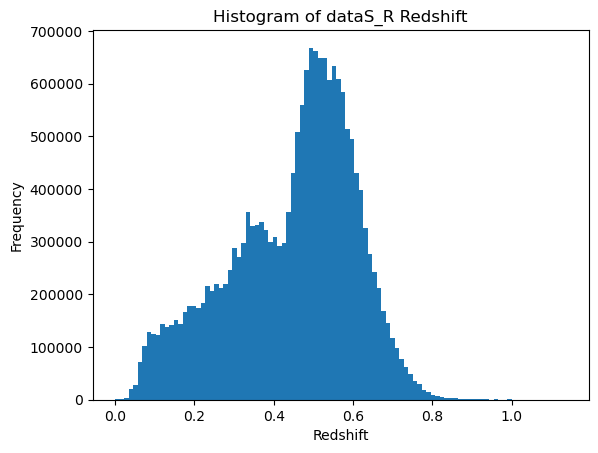

In [179]:
plt.hist(zS_R, bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataS_R Redshift')

## cut my boss north and south into two redshift bins

#### north

In [180]:
north_z1 = north.data[(north.data['REDSHIFT'] >= 0.2) & (north.data['REDSHIFT'] <= 0.5)]
north_z2 = north.data[(north.data['REDSHIFT'] >= 0.5) & (north.data['REDSHIFT'] <= 0.75)]

northR_z1 = northR.data[(northR.data['REDSHIFT'] >= 0.2) & (northR.data['REDSHIFT'] <= 0.5)]
northR_z2 = northR.data[(northR.data['REDSHIFT'] >= 0.5) & (northR.data['REDSHIFT'] <= 0.75)]

shuffle randoms

In [181]:
maskN_z1 = np.random.permutation(len(northR_z1))
maskN_z2 = np.random.permutation(len(northR_z2))

In [182]:
northR_z1 = northR_z1[maskN_z1]
northR_z2 = northR_z2[maskN_z2]

In [183]:
north_z1.columns, north_z1.shape

(ColDefs(
     name = 'RA'; format = 'D'
     name = 'DEC'; format = 'D'
     name = 'REDSHIFT'; format = 'E'
     name = 'WEIGHT'; format = 'E'
 ),
 (429182,))

In [184]:
northR_z1.columns, northR_z1.shape

(ColDefs(
     name = 'RA'; format = 'D'
     name = 'DEC'; format = 'D'
     name = 'REDSHIFT'; format = 'D'
     name = 'WEIGHT'; format = 'D'
 ),
 (21653140,))

(array([2176., 2128., 2122., 2089., 2167., 2124., 2305., 2614., 2740.,
        2572., 2581., 2616., 2514., 2449., 2508., 2414., 2508., 2526.,
        2369., 2491., 2588., 2685., 2713., 2661., 2679., 2690., 2744.,
        2674., 2870., 2813., 3025., 3050., 3237., 3077., 3306., 3417.,
        3460., 3562., 3784., 4063., 3996., 4014., 4115., 4293., 4321.,
        4696., 4762., 4604., 4542., 4509., 4603., 4285., 4318., 4414.,
        4358., 4240., 4009., 4270., 4278., 4041., 3744., 3831., 3882.,
        3817., 3853., 3807., 3781., 3826., 3645., 3853., 3798., 3831.,
        3912., 4081., 4070., 4204., 4283., 4364., 4677., 4743., 5233.,
        5390., 5762., 6352., 6313., 6365., 6609., 6938., 7058., 7697.,
        8181., 8399., 8531., 8803., 8949., 8892., 9059., 9300., 9830.,
        9740.]),
 array([0.20000201, 0.20300199, 0.20600197, 0.20900194, 0.21200192,
        0.2150019 , 0.21800187, 0.22100185, 0.22400182, 0.22700179,
        0.23000176, 0.23300174, 0.23600172, 0.23900169, 0.24200167

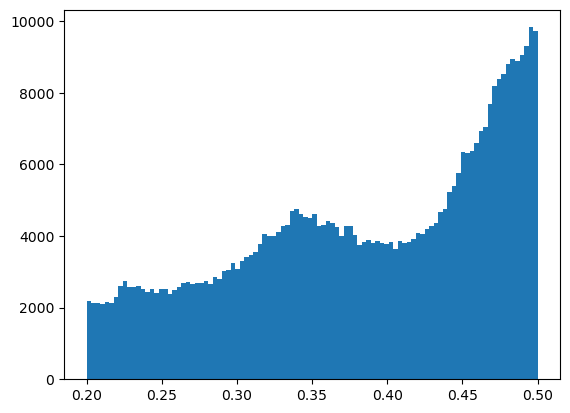

In [185]:
plt.hist(north_z1['REDSHIFT'], bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataN Redshift')

In [186]:
north_z2.columns, north_z2.shape

(ColDefs(
     name = 'RA'; format = 'D'
     name = 'DEC'; format = 'D'
     name = 'REDSHIFT'; format = 'E'
     name = 'WEIGHT'; format = 'E'
 ),
 (435741,))

(array([8413., 8188., 8373., 8259., 8318., 8162., 8358., 8123., 8038.,
        8407., 8052., 8354., 8060., 7968., 7870., 8133., 8006., 8013.,
        7871., 7491., 7339., 7479., 7278., 7426., 7444., 7418., 7317.,
        6839., 6420., 6469., 6247., 6169., 6167., 6237., 5806., 5803.,
        5832., 5836., 5366., 5553., 5306., 5254., 5213., 4841., 4938.,
        4671., 4588., 4610., 4419., 4101., 3923., 3929., 3925., 3797.,
        3637., 3461., 3455., 3177., 3241., 3033., 2872., 2865., 2747.,
        2623., 2627., 2536., 2278., 2289., 2202., 2036., 2059., 1969.,
        1814., 1751., 1742., 1674., 1586., 1568., 1462., 1366., 1344.,
        1228., 1241., 1183., 1091., 1037., 1009.,  958.,  912.,  860.,
         808.,  752.,  739.,  684.,  637.,  634.,  602.,  507.,  521.,
         507.]),
 array([0.50000089, 0.50250089, 0.50500083, 0.50750083, 0.51000082,
        0.51250076, 0.51500076, 0.51750076, 0.5200007 , 0.52250069,
        0.52500069, 0.52750063, 0.53000063, 0.53250057, 0.53500056

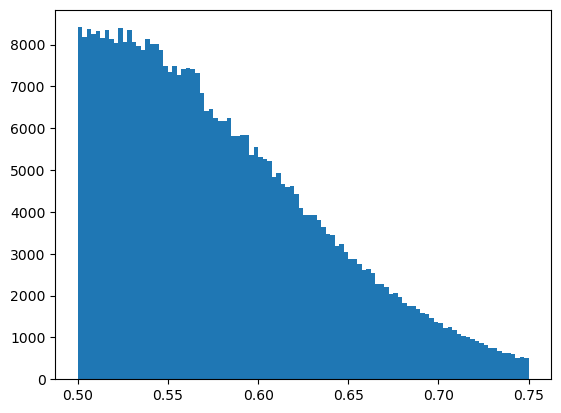

In [187]:
plt.hist(north_z2['REDSHIFT'], bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of dataN Redshift')

In [188]:
northR_z2.columns, northR_z2.shape

(ColDefs(
     name = 'RA'; format = 'D'
     name = 'DEC'; format = 'D'
     name = 'REDSHIFT'; format = 'D'
     name = 'WEIGHT'; format = 'D'
 ),
 (22768148,))

In [189]:
north_z1 = fits.BinTableHDU(north_z1)
northR_z1 = fits.BinTableHDU(northR_z1)
north_z2 = fits.BinTableHDU(north_z2)
northR_z2 = fits.BinTableHDU(northR_z2)


In [190]:
write_header(north_z1, 'BOSS_DR12_CMASSLOWZTOT_North_z1.fits')
write_header(north_z2, 'BOSS_DR12_CMASSLOWZTOT_North_z2.fits')
write_header(northR_z1, 'BOSS_DR12_CMASSLOWZTOT_North_Randoms_z1.fits')
write_header(northR_z2, 'BOSS_DR12_CMASSLOWZTOT_North_Randoms_z2.fits')

In [191]:
north_z1.writeto(os.path.join(outdir,'data/myBOSS_DR12_CMASSLOWZTOT_North_z1.fits'), overwrite=True)
north_z2.writeto(os.path.join(outdir,'data/myBOSS_DR12_CMASSLOWZTOT_North_z2.fits'), overwrite=True)
northR_z1.writeto(os.path.join(outdir,'random/myBOSS_DR12_CMASSLOWZTOT_North_Randoms_z1.fits'), overwrite=True)
northR_z2.writeto(os.path.join(outdir,'random/myBOSS_DR12_CMASSLOWZTOT_North_Randoms_z2.fits'), overwrite=True)

#### south

In [192]:
south_z1 = south.data[(south.data['REDSHIFT'] >= 0.2) & (south.data['REDSHIFT'] <= 0.5)]
south_z2 = south.data[(south.data['REDSHIFT'] >= 0.5) & (south.data['REDSHIFT'] <= 0.75)]

southR_z1 = southR.data[(southR.data['REDSHIFT'] >= 0.2) & (southR.data['REDSHIFT'] <= 0.5)]
southR_z2 = southR.data[(southR.data['REDSHIFT'] >= 0.5) & (southR.data['REDSHIFT'] <= 0.75)]

In [193]:
maskS_z1 = np.random.permutation(len(southR_z1))
maskS_z2 = np.random.permutation(len(southR_z2))

In [194]:
southR_z1 = southR_z1[maskS_z1]
southR_z2 = southR_z2[maskS_z2]

In [195]:
south_z1 = fits.BinTableHDU(south_z1)
southR_z1 = fits.BinTableHDU(southR_z1)

south_z2 = fits.BinTableHDU(south_z2)
southR_z2 = fits.BinTableHDU(southR_z2)

In [196]:
write_header(south_z1, 'BOSS_DR12_CMASSLOWZTOT_South_z1.fits')
write_header(south_z2, 'BOSS_DR12_CMASSLOWZTOT_South_z2.fits')
write_header(southR_z1, 'BOSS_DR12_CMASSLOWZTOT_South_Randoms_z1.fits')
write_header(southR_z2, 'BOSS_DR12_CMASSLOWZTOT_South_Randoms_z2.fits')

In [197]:
south_z1.writeto(os.path.join(outdir,'data/myBOSS_DR12_CMASSLOWZTOT_South_z1.fits'), overwrite=True)
south_z2.writeto(os.path.join(outdir,'data/myBOSS_DR12_CMASSLOWZTOT_South_z2.fits'), overwrite=True)
southR_z1.writeto(os.path.join(outdir,'random/myBOSS_DR12_CMASSLOWZTOT_South_Randoms_z1.fits'), overwrite=True)
southR_z2.writeto(os.path.join(outdir,'random/myBOSS_DR12_CMASSLOWZTOT_South_Randoms_z2.fits'), overwrite=True)

### south z1 footprint

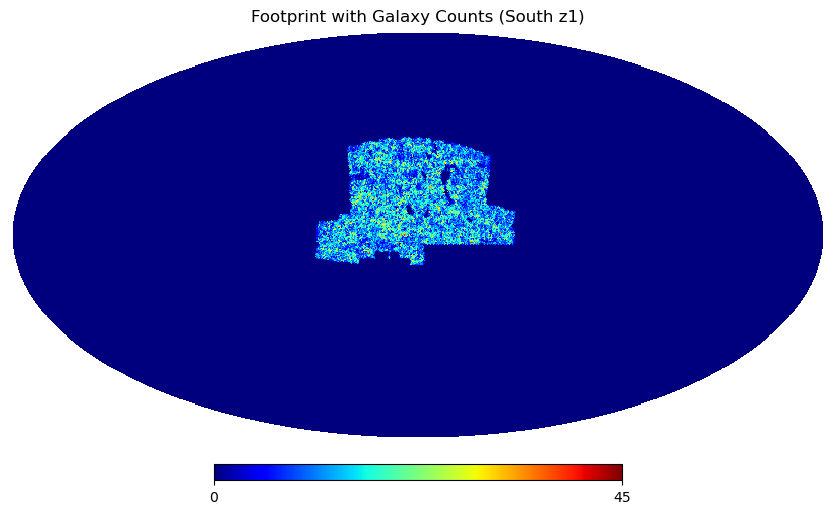

In [198]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside,  south_z1.data['RA'],  south_z1.data['DEC'], lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint with Galaxy Counts (South z1)', cmap='jet')

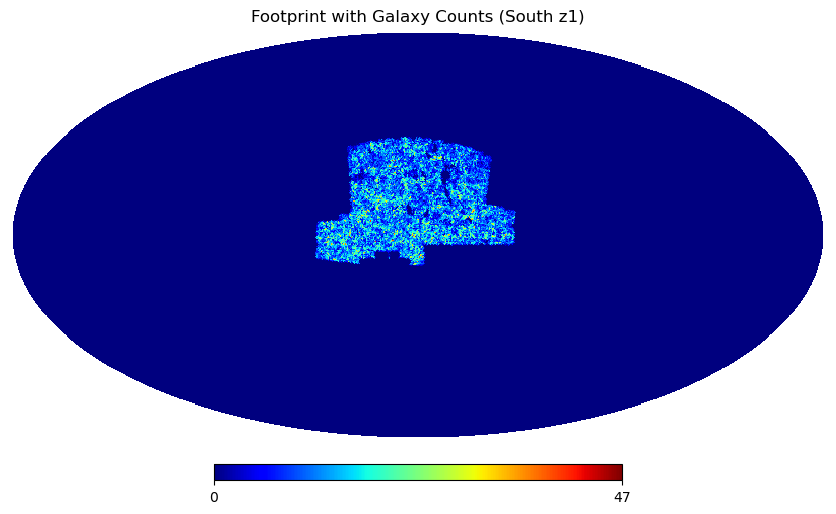

In [199]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside,  south_z2.data['RA'],  south_z2.data['DEC'], lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint with Galaxy Counts (South z1)', cmap='jet')

## check on reconstructed catalogue

north z1

In [216]:
hdul_recN_z1 = fits.open('/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_catalogues/reconstructed/rec-iso/z1/Smth_15/myBOSS_DR12_CMASSLOWZTOT_North_z1.fits')

In [217]:
data_recN_z1 = hdul_recN_z1[1].data

Text(0.5, 1.0, 'Histogram of data_recN_z1 Redshift')

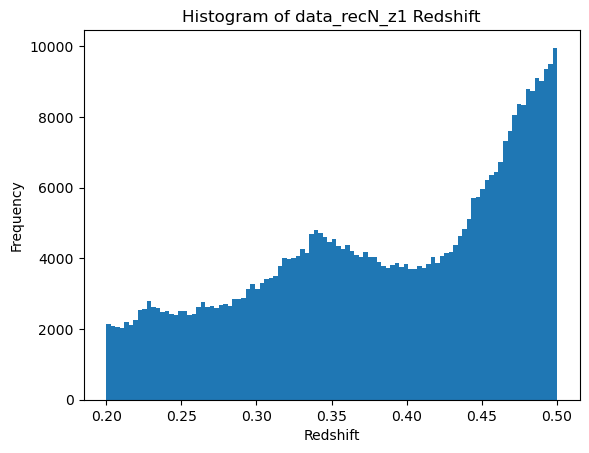

In [218]:
hrec_north_z1=plt.hist(data_recN_z1['REDSHIFT'], bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of data_recN_z1 Redshift')

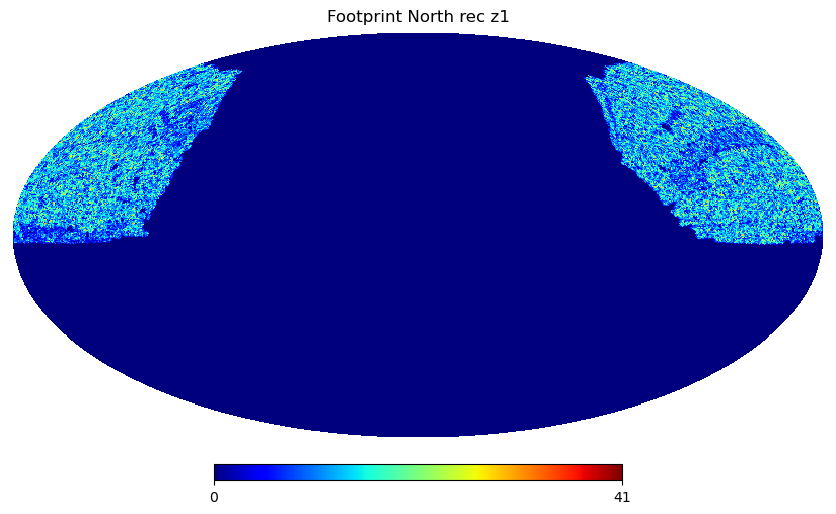

In [219]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside, data_recN_z1['RA'], data_recN_z1['DEC'], lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint North rec z1', cmap='jet')


north z2

In [220]:
hdul_recN_z2 = fits.open('/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_catalogues/reconstructed/rec-iso/z2/Smth_15/myBOSS_DR12_CMASSLOWZTOT_North_z2.fits')

In [221]:
data_recN_z2 = hdul_recN_z2[1].data

Text(0.5, 1.0, 'Histogram of data_recN_z2 Redshift')

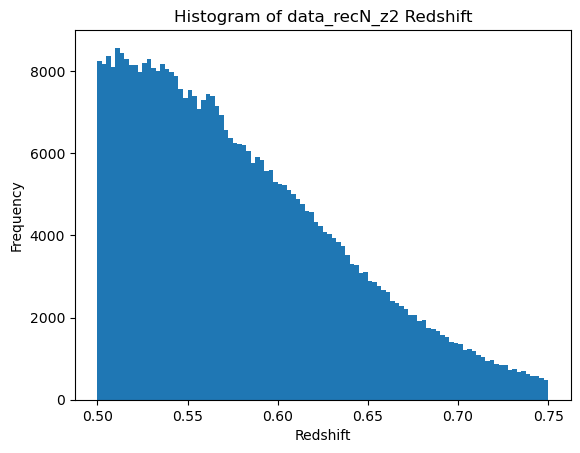

In [223]:
hrec_north_z2=plt.hist(data_recN_z2['REDSHIFT'], bins=100)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of data_recN_z2 Redshift')

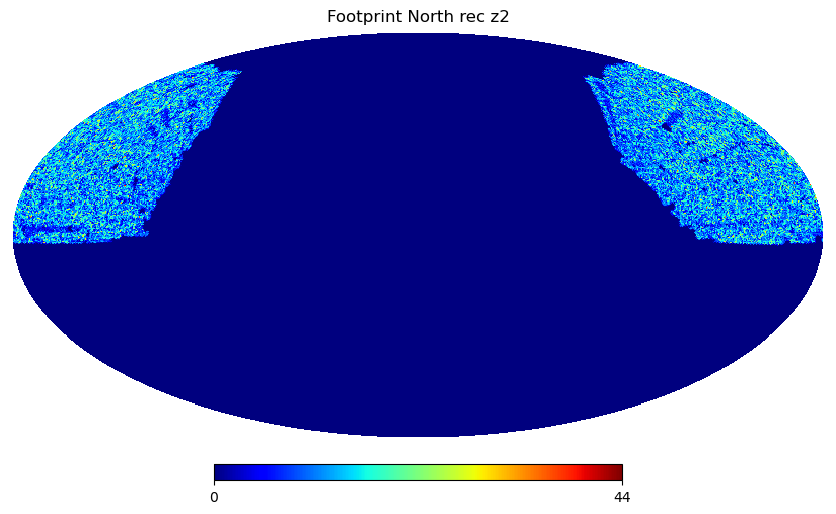

In [224]:
# Set the number of pixels in the map
nside = 128

# Create an empty map
m = np.zeros(hp.nside2npix(nside))

# Get the pixel indices for the galaxies
pix_indices = hp.ang2pix(nside, data_recN_z2['RA'], data_recN_z2['DEC'], lonlat=True)

# Count the number of galaxies in each pixel
galaxy_counts = np.bincount(pix_indices, minlength=len(m))

# Set the color of each pixel based on the number of galaxies
m[pix_indices] = galaxy_counts[pix_indices]

# Plot the map
hp.mollview(m, title='Footprint North rec z2', cmap='jet')


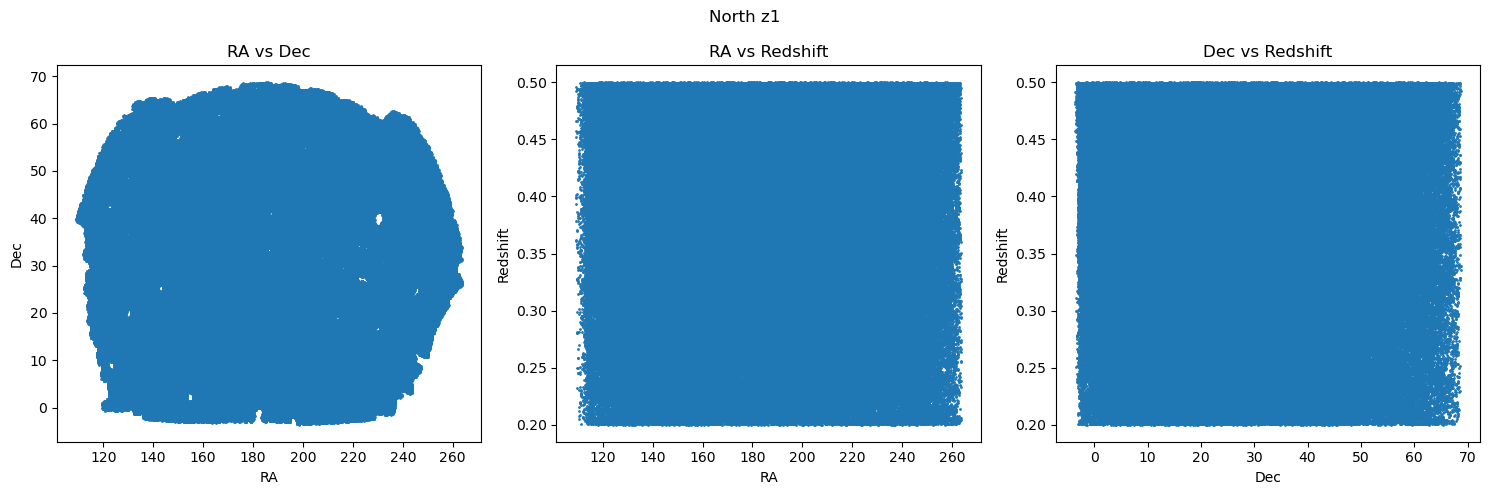

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.suptitle('North z1')
# Plot in RA and Dec
plt.subplot(1, 3, 1)
plt.scatter(data_recN_z1['RA'], data_recN_z1['DEC'], s=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('RA vs Dec')

# Plot in RA and redshift
plt.subplot(1, 3, 2)
plt.scatter(data_recN_z1['RA'], data_recN_z1['REDSHIFT'], s=1)
plt.xlabel('RA')
plt.ylabel('Redshift')
plt.title('RA vs Redshift')

# Plot in Dec and redshift
plt.subplot(1, 3, 3)
plt.scatter(data_recN_z1['DEC'], data_recN_z1['REDSHIFT'], s=1)
plt.xlabel('Dec')
plt.ylabel('Redshift')
plt.title('Dec vs Redshift')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


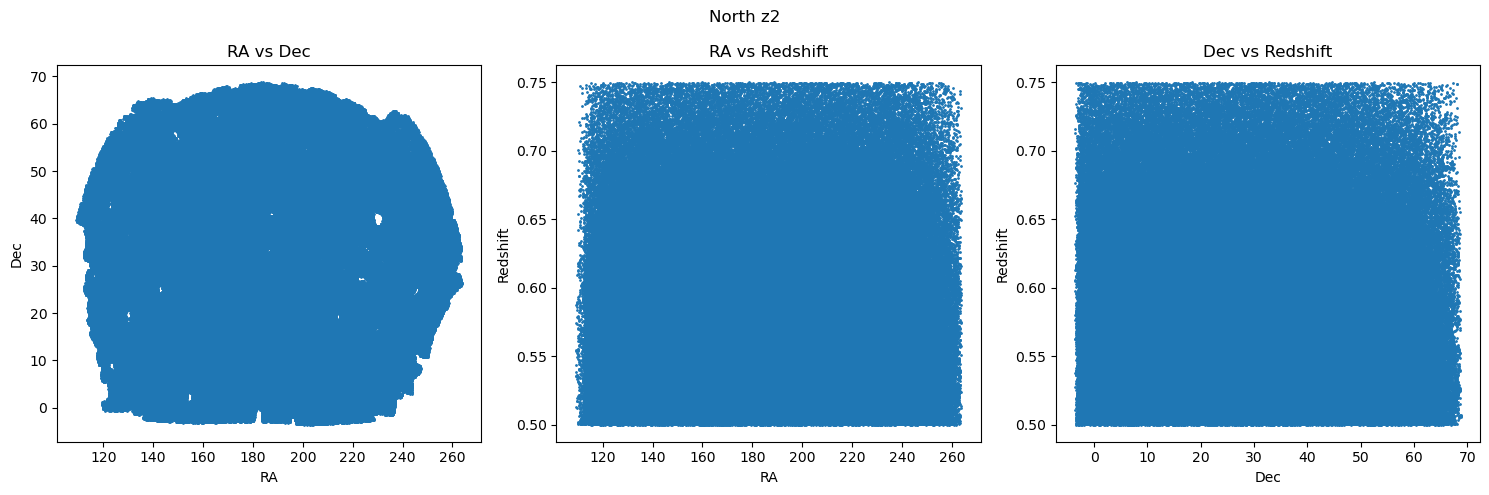

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.suptitle('North z2')
# Plot in RA and Dec
plt.subplot(1, 3, 1)
plt.scatter(data_recN_z2['RA'], data_recN_z2['DEC'], s=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('RA vs Dec')

# Plot in RA and redshift
plt.subplot(1, 3, 2)
plt.scatter(data_recN_z2['RA'], data_recN_z2['REDSHIFT'], s=1)
plt.xlabel('RA')
plt.ylabel('Redshift')
plt.title('RA vs Redshift')

# Plot in Dec and redshift
plt.subplot(1, 3, 3)
plt.scatter(data_recN_z2['DEC'], data_recN_z2['REDSHIFT'], s=1)
plt.xlabel('Dec')
plt.ylabel('Redshift')
plt.title('Dec vs Redshift')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


south z1

In [225]:
hdul_recS_z1 = fits.open('/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_catalogues/reconstructed/rec-iso/z1/Smth_15/myBOSS_DR12_CMASSLOWZTOT_South_z1.fits')

FileNotFoundError: [Errno 2] No such file or directory: '/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_catalogues/reconstructed/rec-iso/z1/Smth_15/myBOSS_DR12_CMASSLOWZTOT_South_z1.fits'